In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [129]:
df=pd.read_csv('C:/Users/Venati Himanth/OneDrive/Desktop/strive/python/ML/Images/Prediction_of_house_price_using_ML/Advanced Housing_using ML/test.csv')

In [130]:
df.shape

(1459, 80)

In [131]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [132]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna('missing')
df['BsmtQual']=df['BsmtQual'].fillna('missing')
df['BsmtCond']=df['BsmtCond'].fillna('missing')
df['BsmtExposure']=df['BsmtExposure'].fillna('missing')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('missing')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('missing')
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])



In [133]:
df.drop('MiscFeature',axis=1,inplace=True)
df.drop('Id',axis=1,inplace=True)
df.drop('Alley',axis=1,inplace=True)
df.drop('Fence',axis=1,inplace=True)
df.drop('PoolQC',axis=1,inplace=True)
df.drop('Utilities',axis=1,inplace=True)
df.drop('BsmtFullBath',axis=1,inplace=True)

In [134]:
#Garageyrblt this is a year so we need to go into another way
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[feature]=df['YrSold']-df[feature]

In [135]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [136]:
features_na=[features for features in df.columns if df[features].isnull().sum()>1 ]
for feature in features_na:
    print(feature,np.round(df[feature].isnull().mean(),6))

In [137]:
df.shape

(1459, 73)

<AxesSubplot:>

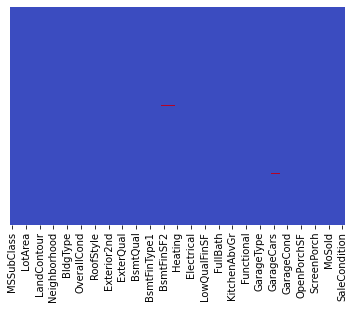

In [138]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [139]:
df['SaleType'].isnull().sum()

0

In [140]:
df['SaleType'].value_counts().unique

<bound method Series.unique of WD       1259
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64>

In [141]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64